# Writing a simple AMB from idea to implementation

This code is not a real ABM, it was written live at the tutorial to show how to go from a simple idea to a Mesa implementation.

### Initial Sketch of idea (implemented differently)

- People
    - happiness: int
    - friends: list
    - enemies: list
    - interact (random person):
        - if random person is in friends:
            - satisfaction += 2
        - if random person is in enemies:
            - satisfaction -= 1

- Measure we care about
    - average satisfaction
    
- Initialisation:
    - 100 people
    - random sample of 3 friends and 3 enemies
    


In [1]:
import mesa

In [2]:
class Person(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.happiness = 1
        self.friends = []
        self.enemies = []

    def add_friend(self):
        self.model.random.shuffle(self.model.agents)

        for pf in self.model.agents:
            if pf != self and pf not in self.friends and pf not in self.enemies:
                self.friends.append(pf)
                break

    def add_enemy(self):
        self.model.random.shuffle(self.model.agents)

        for pf in self.model.agents:
            if pf != self and pf not in self.friends and pf not in self.enemies:
                self.enemies.append(pf)
                break

    def step(self):
        # choose either a friend or an enemy
        if self.model.random.random() < 0.5:
            other_person = self.model.random.choice(self.friends)
            self.happiness += other_person.happiness
        else:
            other_person = self.model.random.choice(self.enemies)
            self.happiness -= other_person.happiness

In [3]:
class PersonModel(mesa.Model):
    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        self.running = True
        self.agents = []

        for i in range(self.num_agents):
            a = Person(i, self)
            self.agents.append(a)
            self.schedule.add(a)

        for agent in self.schedule.agents:
            for i in range(5):
                agent.add_friend()
                agent.add_enemy()

    def step(self):
        self.schedule.step()

In [7]:
my_model = PersonModel(1000)
for i in range(30):
    my_model.step()

/var/folders/6k/5hmkfvg15c96n_sg9wvgtgzm0000gn/T/ipykernel_43268/2032826190.py:7: UserWarning: You are trying to set model.agents. In a next release, this attribute is used by MESA itself so you cannot use it directly anymore.Please adjust your code to use a different attribute name for custom agent storage
  self.agents = []


In [8]:
final_happinesses = [agent.happiness for agent in my_model.agents]

(array([  1.,   0.,   0.,   1.,   2.,   1.,   3.,   3.,  13.,  10.,  30.,
         39.,  89., 112., 134., 131., 132., 108.,  85.,  56.,  21.,  10.,
          5.,   7.,   4.,   1.,   0.,   0.,   1.,   1.]),
 array([-74049689.        , -69176675.1       , -64303661.2       ,
        -59430647.3       , -54557633.4       , -49684619.5       ,
        -44811605.59999999, -39938591.7       , -35065577.8       ,
        -30192563.9       , -25319550.        , -20446536.09999999,
        -15573522.2       , -10700508.3       ,  -5827494.39999999,
          -954480.5       ,   3918533.40000001,   8791547.30000001,
         13664561.2       ,  18537575.10000001,  23410589.        ,
         28283602.90000001,  33156616.80000001,  38029630.7       ,
         42902644.60000001,  47775658.50000001,  52648672.40000001,
         57521686.30000001,  62394700.20000002,  67267714.10000002,
         72140728.        ]),
 <BarContainer object of 30 artists>)

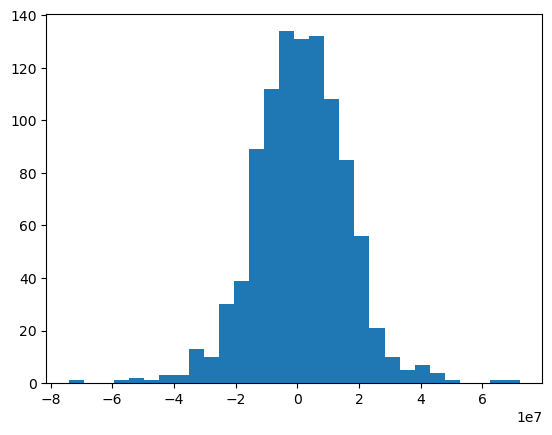

In [9]:
# plot the distribution of happinesses
import matplotlib.pyplot as plt

plt.hist(final_happinesses, bins=30)